In [8]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Deep Neural Network

In [ ]:
# --- Load data ---
(X_train, y_train), (X_test, y_test) = mnist.load_data()

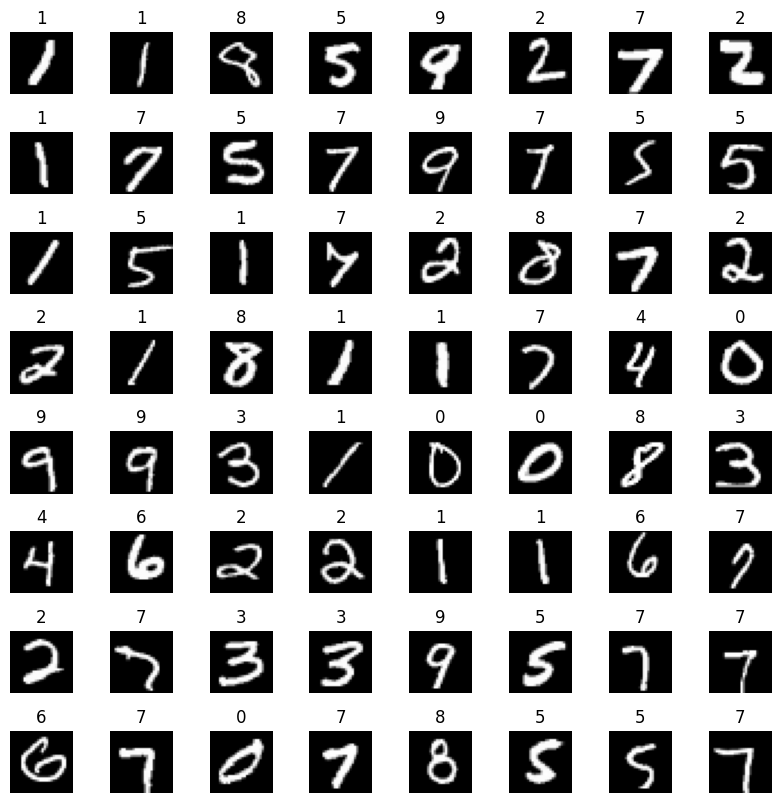

In [20]:
m = X_train.shape[0]

# --- Plot 8x8 grid of random MNIST digits ---
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1)

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    X_random_reshaped = X_train[random_index]  # Already 28x28
    ax.imshow(X_random_reshaped, cmap='gray')
    ax.set_title(str(y_train[random_index]))
    ax.set_axis_off()

plt.show()

Epoch 1/15
422/422 - 7s - 18ms/step - accuracy: 0.8803 - loss: 0.3984 - val_accuracy: 0.9660 - val_loss: 0.1191
Epoch 2/15
422/422 - 4s - 9ms/step - accuracy: 0.9490 - loss: 0.1736 - val_accuracy: 0.9750 - val_loss: 0.0873
Epoch 3/15
422/422 - 4s - 9ms/step - accuracy: 0.9610 - loss: 0.1299 - val_accuracy: 0.9770 - val_loss: 0.0780
Epoch 4/15
422/422 - 3s - 8ms/step - accuracy: 0.9681 - loss: 0.1042 - val_accuracy: 0.9792 - val_loss: 0.0688
Epoch 5/15
422/422 - 6s - 13ms/step - accuracy: 0.9717 - loss: 0.0915 - val_accuracy: 0.9777 - val_loss: 0.0702
Epoch 6/15
422/422 - 4s - 8ms/step - accuracy: 0.9766 - loss: 0.0770 - val_accuracy: 0.9813 - val_loss: 0.0650
Epoch 7/15
422/422 - 3s - 8ms/step - accuracy: 0.9774 - loss: 0.0702 - val_accuracy: 0.9803 - val_loss: 0.0664
Epoch 8/15
422/422 - 5s - 13ms/step - accuracy: 0.9796 - loss: 0.0634 - val_accuracy: 0.9803 - val_loss: 0.0648
Epoch 9/15
422/422 - 3s - 8ms/step - accuracy: 0.9804 - loss: 0.0601 - val_accuracy: 0.9823 - val_loss: 0.060

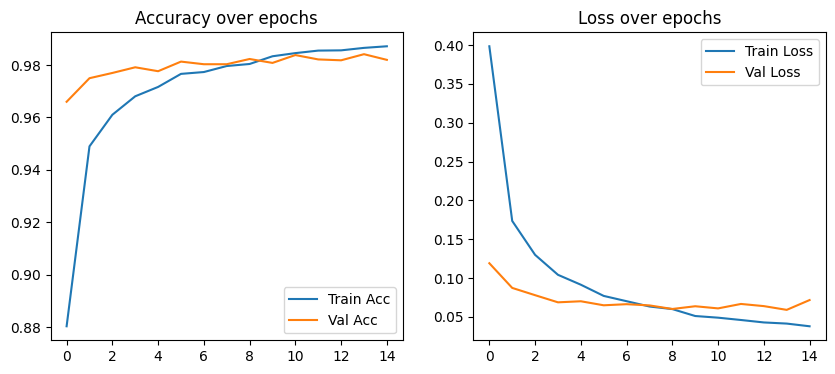

In [ ]:
# Normalize pixel values (0–255 → 0–1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten 28x28 images → 784-dimensional vectors
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# --- Build DNN model ---
model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')   # 10 output classes
])

# --- Compile model ---
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# --- Train model ---
history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

# --- Evaluate model ---
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# --- Plot training performance ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy over epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss over epochs')
plt.show()


In [ ]:
# Save the whole model (architecture + weights + optimizer)
# model.save("mnist_dnn_model.h5")

# Later (or tomorrow), you can load it back easily
# from tensorflow.keras.models import load_model
# model = load_model("mnist_dnn_model.h5")

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705,440 (2.69 MB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 470,294 (1.79 MB)

## Visualize misclassified images

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Total misclassified samples: 201


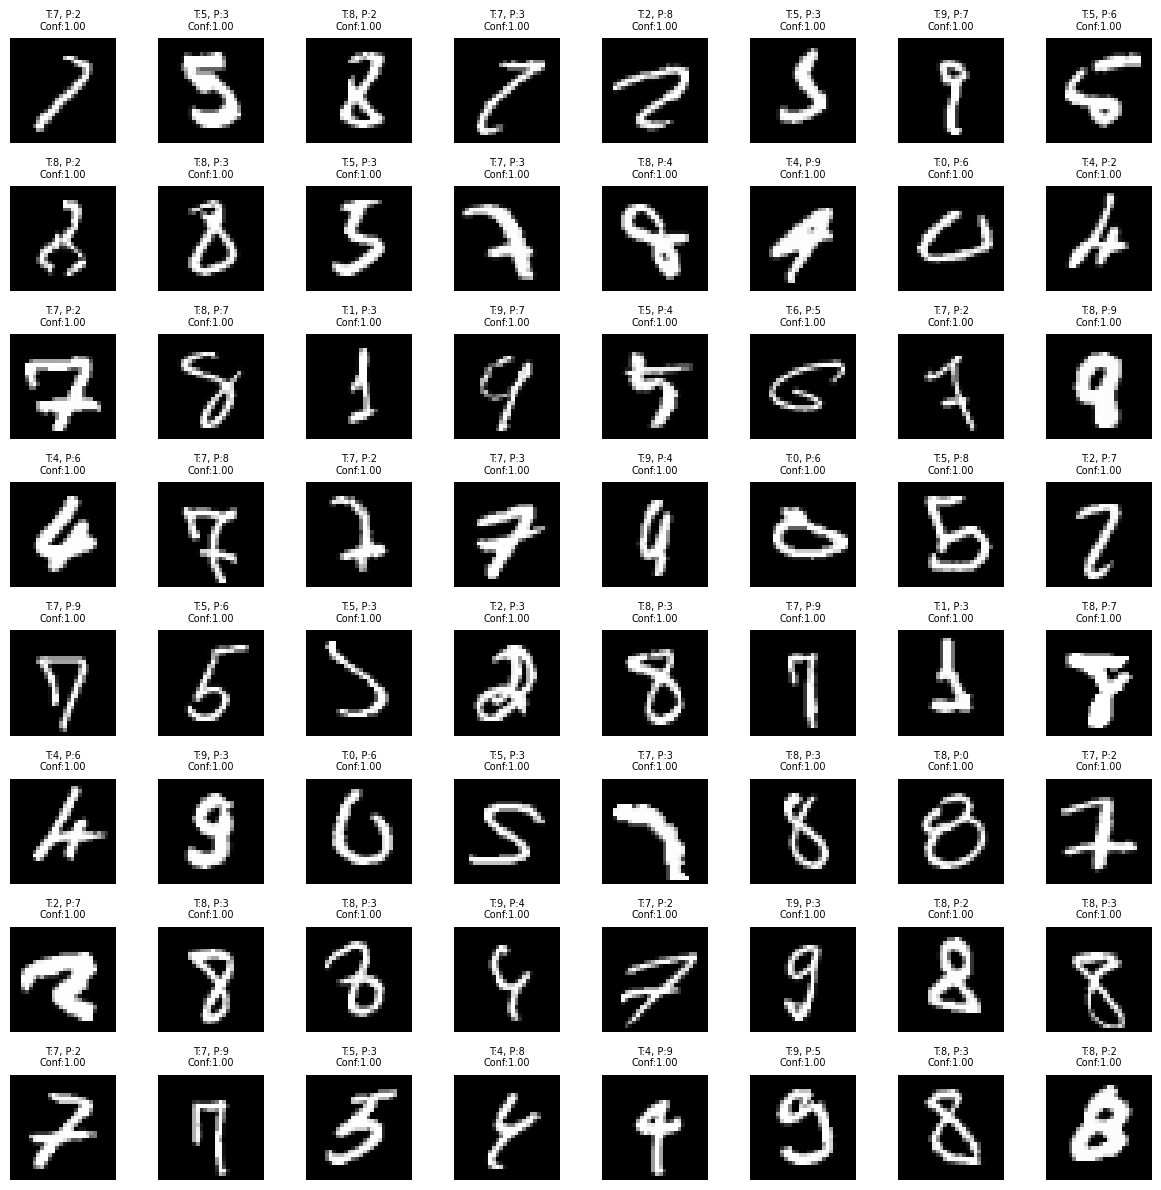

In [31]:
# --- Predict on test set ---
X_test_flat = X_test.reshape((X_test.shape[0], 28 * 28))
y_pred = model.predict(X_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)

# If y_test is one-hot encoded
y_true = y_test

# --- Identify misclassified samples ---
errors = np.where(y_pred_classes != y_true)[0]
print(f"Total misclassified samples: {len(errors)}")

# # --- Plot all misclassified images ---
# num_errors = len(errors)
# cols = 10
# rows = int(np.ceil(num_errors / cols))

# plt.figure(figsize=(cols * 1.5, rows * 1.5))

# for i, idx in enumerate(errors):
#     plt.subplot(rows, cols, i + 1)
#     plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
#     plt.title(f"T:{y_true[idx]}, P:{y_pred_classes[idx]}", fontsize=8)
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

# --- Select the 64 most uncertain misclassifications ---
y_pred_confidence = np.max(y_pred, axis=1)

error_confidences = y_pred_confidence[errors]
least_confident_idx = errors[np.argsort(error_confidences)[:64]]

# --- Plot them ---
plt.figure(figsize=(12, 12))
for i, idx in enumerate(least_confident_idx):
    plt.subplot(8, 8, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_true[idx]}, P:{y_pred_classes[idx]}\nConf:{y_pred_confidence[idx]:.2f}", fontsize=7)
    plt.axis('off')

plt.tight_layout()
plt.show()

# # --- Randomly pick one misclassified example ---
# random_index = np.random.choice(errors)
# X_misclassified = X_test[random_index].reshape(28, 28)

# # --- Visualize misclassified image ---
# plt.figure(figsize=(2, 2))
# plt.imshow(X_misclassified, cmap='gray')
# plt.title(f"True: {y_true[random_index]}, Pred: {y_pred_classes[random_index]}")
# plt.axis('off')
# plt.show()


### Visualize confidently misclassified images

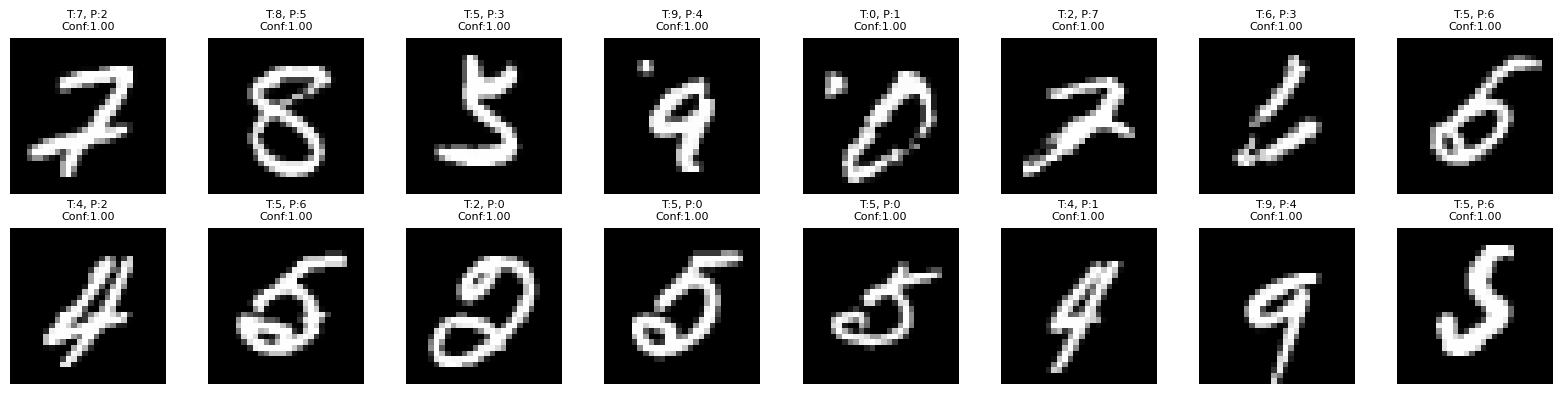

In [34]:
# --- Select the 16 most confident misclassified predictions ---
error_confidences = y_pred_confidence[errors]
most_confident_errors = errors[np.argsort(error_confidences)[-16:]]  # top 16 by confidence

# --- Plot them (2x8 grid) ---
plt.figure(figsize=(16, 4))
for i, idx in enumerate(most_confident_errors):
    plt.subplot(2, 8, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(
        f"T:{y_true[idx]}, P:{y_pred_classes[idx]}\nConf:{y_pred_confidence[idx]:.2f}",
        fontsize=8
    )
    plt.axis('off')

plt.tight_layout()
plt.show()

## Visualized correctly classified images 

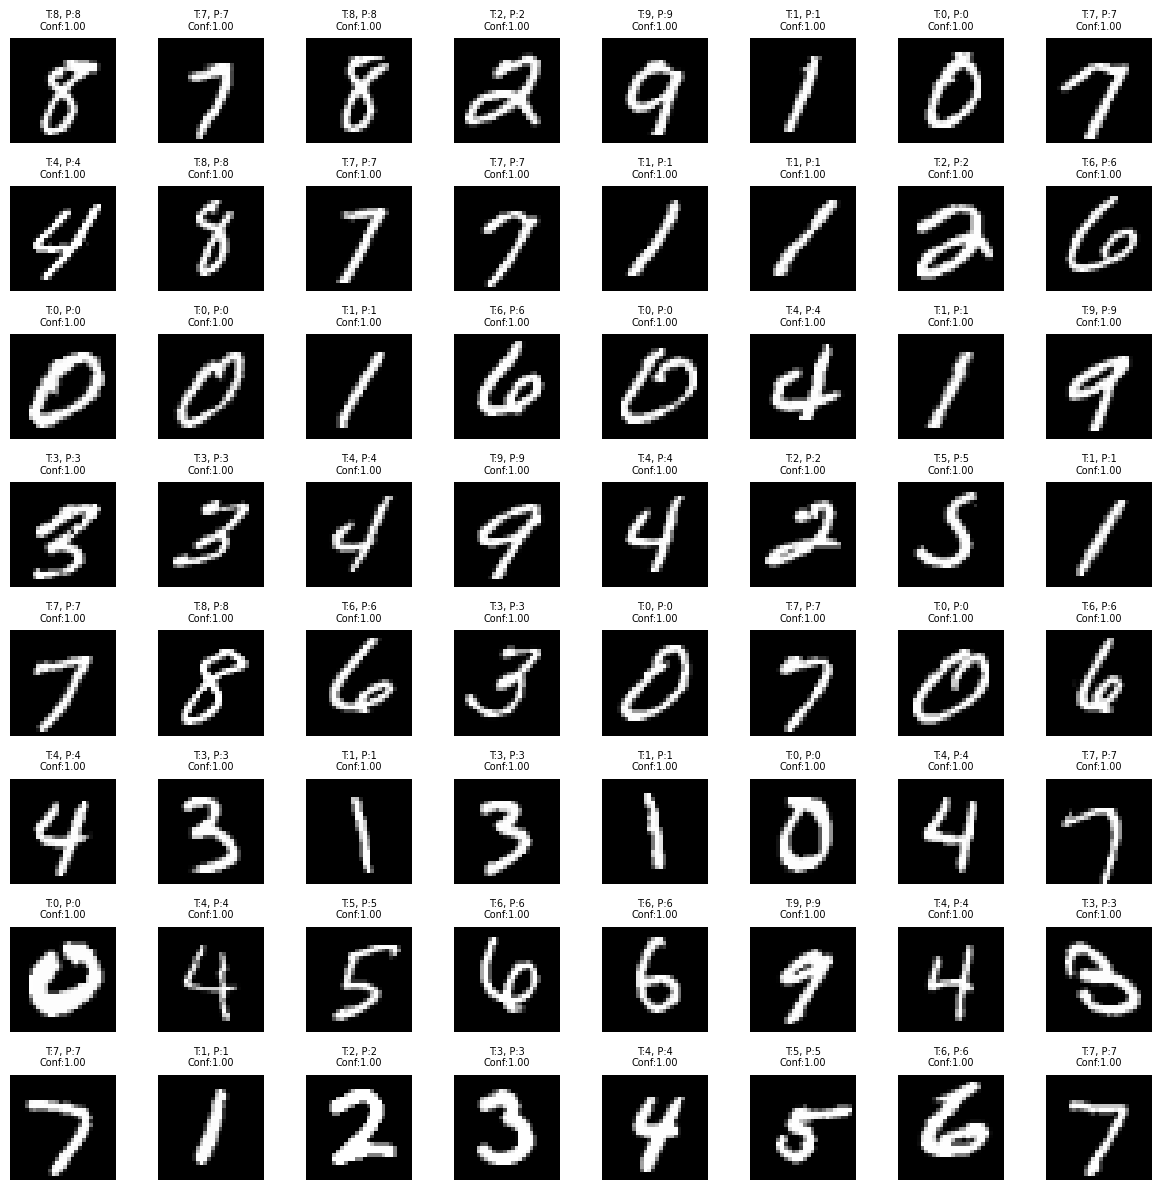

In [32]:
# --- Identify correctly classified samples ---
correct = np.where(y_pred_classes == y_true)[0]

# --- Select the 64 most confident correct predictions ---
correct_confidences = y_pred_confidence[correct]
most_confident_idx = correct[np.argsort(correct_confidences)[-64:]]  # highest 64 confidences

# --- Plot them ---
plt.figure(figsize=(12, 12))
for i, idx in enumerate(most_confident_idx):
    plt.subplot(8, 8, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"T:{y_true[idx]}, P:{y_pred_classes[idx]}\nConf:{y_pred_confidence[idx]:.2f}", fontsize=7)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Convolutional Neural Network

Model loaded successfully!

Test Accuracy: 0.9922
Test Loss: 0.0270


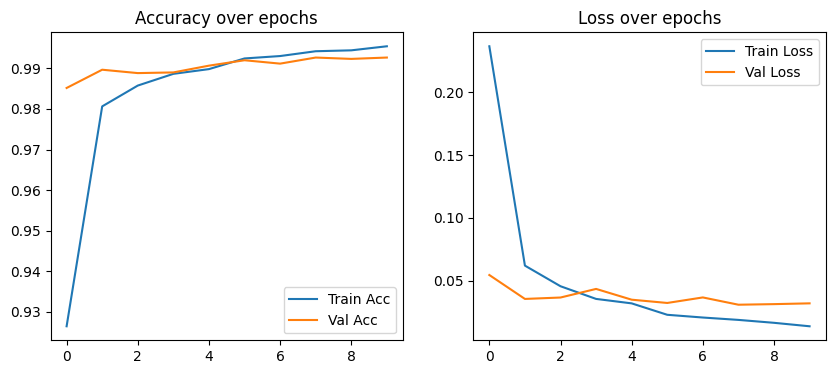

In [ ]:
import pickle
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# --- Reshape and normalize ---
# CNN expects 4D input: (samples, height, width, channels)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype("float32") / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype("float32") / 255.0

# --- One-hot encode labels ---
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# # --- Build CNN model ---
# modelCNN = models.Sequential([
#     layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
#     layers.MaxPooling2D((2,2)),
    
#     layers.Conv2D(64, (3,3), activation='relu'),
#     layers.MaxPooling2D((2,2)),
    
#     layers.Conv2D(128, (3,3), activation='relu'),
#     layers.Flatten(),
#     layers.Dropout(0.3),
    
#     layers.Dense(128, activation='relu'),
#     layers.Dense(10, activation='softmax')
# ])

# # --- Compile model ---
# modelCNN.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

# # --- Train model ---
# history = modelCNN.fit(
#     X_train, y_train,
#     epochs=10,
#     batch_size=128,
#     validation_split=0.1,
#     verbose=2
# )
# --- Load saved model ---
modelCNN = models.load_model("Model\mnist_cnn_model.keras")
print("Model loaded successfully!")
with open("Model\mnist_cnn_history.pkl", "rb") as f:
    history = pickle.load(f)


# --- Evaluate model ---
test_loss, test_acc = modelCNN.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# --- Plot training performance ---
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history['accuracy'], label='Train Acc')
plt.plot(history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy over epochs')

plt.subplot(1,2,2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss over epochs')
plt.show()

In [ ]:
# import pickle

# # --- Save model ---
# modelCNN.save("mnist_cnn_model.keras")

# # --- Save training history ---
# with open("mnist_cnn_history.pkl", "wb") as f:
#     pickle.dump(history.history, f)


## Visualize misclassified images

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Total misclassified samples: 96


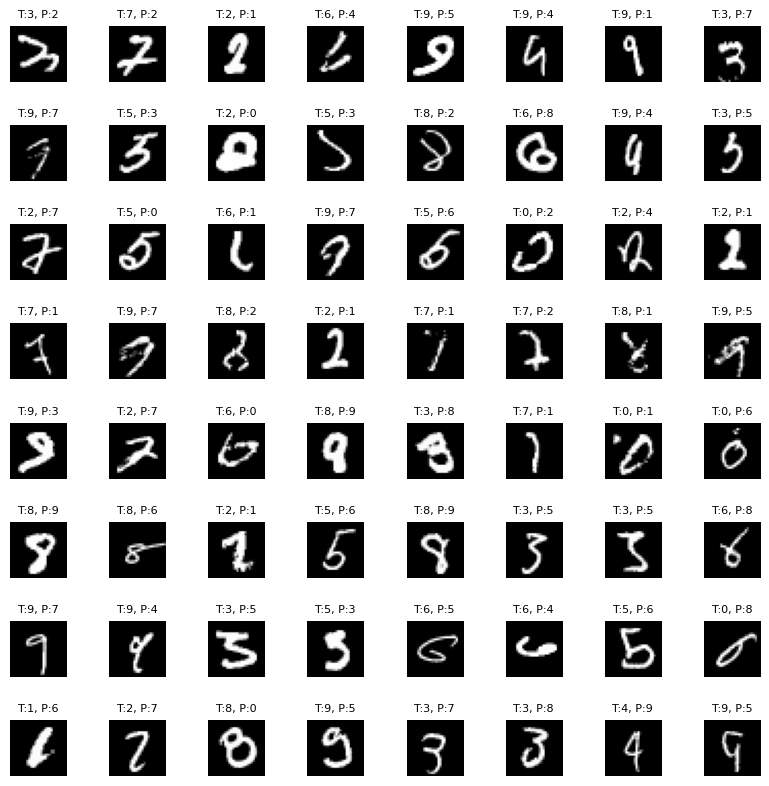

In [39]:
# --- Predict on test set ---
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# --- Identify misclassified samples ---
errors = np.where(y_pred_classes != y_true)[0]
print(f"Total misclassified samples: {len(errors)}")

# --- Randomly select 64 misclassified samples ---
if len(errors) > 64:
    selected_errors = np.random.choice(errors, 64, replace=False)
else:
    selected_errors = errors  # if less than 64 misclassifications

# --- Plot the images ---
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.5)

for i, ax in enumerate(axes.flat):
    if i < len(selected_errors):
        idx = selected_errors[i]
        ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
        ax.set_title(f"T:{y_true[idx]}, P:{y_pred_classes[idx]}", fontsize=8)
        ax.axis('off')
    else:
        ax.axis('off')

plt.show()


# Test with new data

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps


In [ ]:
import os
import re
import numpy as np
from PIL import Image
from tensorflow.keras.utils import to_categorical

# --- Configuration ---
data_dir = "Data\digit"
model_type = "cnn"  # change to "dnn" if using your DNN model

# --- Prepare containers ---
X_custom = []
y_custom = []

# --- Regex pattern to extract label from filename (e.g., img7.png → 7) ---
pattern = re.compile(r'(\d+)')

# --- Load and preprocess each image ---
for filename in sorted(os.listdir(data_dir)):
    if not filename.lower().endswith((".png")):
        continue

    img_path = os.path.join(data_dir, filename)
    img = Image.open(img_path).convert('L')  # ensure grayscale
    img_array = np.array(img).astype("float32") / 255.0  # normalize

    # Reshape depending on model type
    if model_type.lower() == "cnn":
        img_array = img_array.reshape(28, 28, 1)
    else:
        img_array = img_array.reshape(784)

    # Extract label from filename
    match = pattern.search(filename)
    if match:
        label = int(match.group(1))
    else:
        raise ValueError(f"Cannot extract label from filename: {filename}")

    X_custom.append(img_array)
    y_custom.append(label)

# --- Convert to arrays ---
X_custom = np.array(X_custom)
y_custom = np.array(y_custom)

# --- One-hot encode labels ---
y_custom_cat = to_categorical(y_custom, 10)

print("✅ Preprocessing complete!")
print(f"X_custom shape: {X_custom.shape}")
print(f"y_custom shape: {y_custom.shape}")
print(f"Labels found: {y_custom}")


✅ Preprocessing complete!
X_custom shape: (10, 28, 28, 1)
y_custom shape: (10,)
Labels found: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# --- Ensure the save folder exists ---
save_dir = "Data"

# --- Save preprocessed data ---
save_path = os.path.join(save_dir, "custom_digits_preprocessed.npz")
np.savez(save_path, X=X_custom, y=y_custom, y_cat=y_custom_cat)

print(f" Saved preprocessed data to '{save_path}'")


 Saved preprocessed data to 'Data/Models\custom_digits_preprocessed.npz'


Loaded 10 custom digit images.
✅ Model loaded from: Data/Models/mnist_cnn_model.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

✅ Correct predictions: 5/10 (50.00%)
Image 0: True=0, Pred=0, Certainty=0.9762
Image 1: True=1, Pred=4, Certainty=0.6615
Image 2: True=2, Pred=2, Certainty=0.8690
Image 3: True=3, Pred=8, Certainty=0.6699
Image 4: True=4, Pred=4, Certainty=0.4372
Image 5: True=5, Pred=5, Certainty=0.4981
Image 6: True=6, Pred=6, Certainty=0.5095
Image 7: True=7, Pred=8, Certainty=0.3962
Image 8: True=8, Pred=0, Certainty=0.3930
Image 9: True=9, Pred=8, Certainty=0.9763


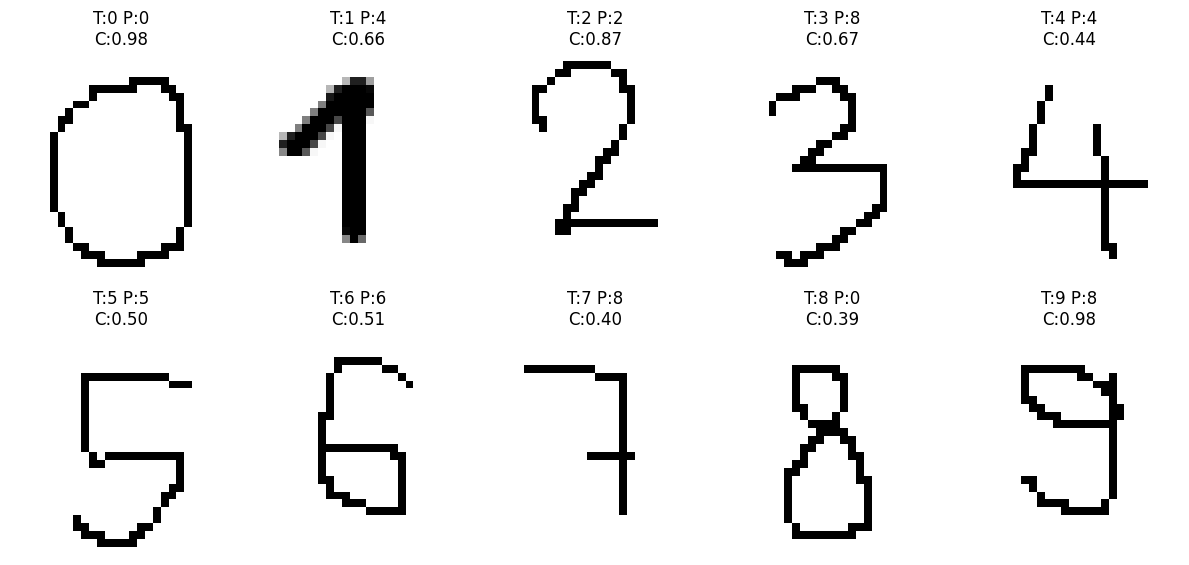

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models

# --- Load preprocessed data ---
data = np.load("Data/custom_digits_preprocessed.npz")
X_custom = data["X"]        # shape: (n_samples, 28, 28, 1)
y_custom = data["y"]        # true labels (0–9)

print(f"Loaded {len(X_custom)} custom digit images.")

# --- Load trained CNN model ---
model_path = "Data/Models/mnist_cnn_model.keras"
modelCNN = models.load_model(model_path)
print(f"✅ Model loaded from: {model_path}")

# --- Make predictions ---
y_pred_probs = modelCNN.predict(X_custom)
y_pred = np.argmax(y_pred_probs, axis=1)
confidence = np.max(y_pred_probs, axis=1)

# --- Evaluate predictions ---
correct = np.sum(y_pred == y_custom)
total = len(y_custom)
accuracy = correct / total * 100

print(f"\n✅ Correct predictions: {correct}/{total} ({accuracy:.2f}%)")

# --- Print each result ---
for i in range(len(X_custom)):
    print(f"Image {i}: True={y_custom[i]}, Pred={y_pred[i]}, Certainty={confidence[i]:.4f}")

# --- Visualize predictions ---
plt.figure(figsize=(12, 6))
for i in range(len(X_custom)):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_custom[i].reshape(28, 28), cmap="gray")
    plt.title(f"T:{y_custom[i]} P:{y_pred[i]}\nC:{confidence[i]:.2f}")
    plt.axis("off")

plt.tight_layout()
plt.show()
